In [1]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')       # (코랩)한글 폰트

#A* 알고리즘
### - 개요
  그래프 탐색 알고리즘 중 하나<br>
  시작 노드에서 목표 노드까지 최단 경로를 효율적으로 찾는 것이 목표<br>
  휴리스틱 함수를 사용해 탐색 방향을 안내 => 불필요한 탐생 범위 감소 및 더 빠른 탐색 가능<br>
  휴리스틱 함수<br>
 &emsp;- 현재 상태에서 목표 상태까지의 예상 비용을 계산하는 함수<br>
 &emsp;- 설계에 따라 탐색의 효율성과 최적 경로 보장이 결정

 ### - 특징
 <ul>
 <li><p>최적성 (Optimality)</p>항상 최단 경로를 찾음</li>
 <li><p>효율성 (Efficiency)</p>더 적은 노드를 방문하고 해를 찾을 수 있음</li>
 <li><p>유연성 (Flexibility)</p>휴리스틱 함수의 설계에 따라 탐색 성능 조정 가능</li>
 </ul>


 ### - 동작 방식
 <ol>
 <li><p>초기화</p>
 <ul><li><p>시작 노드를 open set에 추가</p>open set은 아직 방문하지 않았지만 탐색할 가능성이 있는 노드들의 집합</li>
 <li><p>노드에 대한 비용 g(n)과 추정 총 비용 f(n)을 초기화</p>
g(n) : 시작 노드에서 노드 n까지의 실제 비용 (일반적으로 0으로 초기화)<br>
h(n) : 노드 n에서 목표 노드까지의 휴리스틱 추정 비용<br>
f(n) : g(n) + h(n) => 시작 노드를 거쳐 노드 n을 지나 목표 노드까지 가는 추정 총 비용</li>
<li><p>각 노드의 부모 노드를 기록하는 맵을 초기화</p>최단 경로를 역추적하는 데 사용</li>
 </ul></li>

 <li><p>반복 : open set이 비어있지 않는 동안 반복</p>
 <ul><li><p>open set에서 가장 낮은 f(n) 값을 가진 노드를 선택</p>선택된 노드가 목표 노드라면, 맵을 이용하여 최단 경로를 역추적하고 반환</li>
 <li><p>open set에서 선택한 노드를 제거 및 closed set에 추가</p>
closed set : 이미 방문한 노드들의 집합</li>
<li><p>선택한 노드의 모든 이웃 노드 neighbor에 대해 반복</p>neighbor가 closed set에 있다면 continue<br>선택한 노드를 거쳐 neighbor까지의 비용 gScore를 계산 (gScore = g(current) + cost(current, neighbor))</li>
<li><p>만약 neighbor가 open set에 없거나, gScore가 현재 g(neighbor)보다 작다면</p>neighbor의 부모 노드를 current로 설정 (map[neighbor] = current).<br>g(neighbor) = gScore로 갱신<br>h(neighbor) = 휴리스틱 함수를 이용하여 계산<br>f(neighbor) = g(neighbor) + h(neighbor)로 갱신</li>
<li><p>만약 neighbor가 open set에 없다면</p>open set에 추가</li>
 </ul></li>

 <li><p>실패</p><ul><li>open set이 비어있게 되면 목표 노드까지의 경로가 존재하지 않는 것으로 판단</li><ul></li>
 </ol>


A* 알고리즘 최단 경로: [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)]


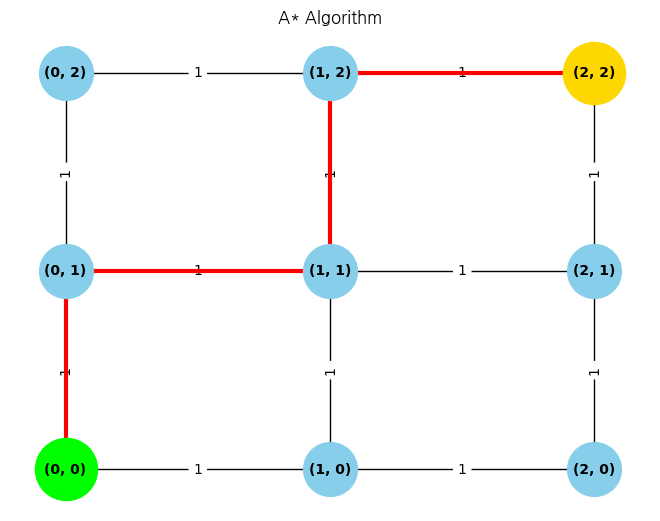

In [16]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def a_star(graph, start, goal, heuristic):
    open_set = [(0, start)]  # (f_score, node)
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    while open_set:
        current_f, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor, weight in graph.get(current, {}).items():
            tentative_g_score = g_score[current] + weight
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def euclidean_distance(node1, node2):
    # 노드의 좌표가 주어졌다고 가정
    x1, y1 = node1
    x2, y2 = node2
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# 테스트 데이터
graph_a_star = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(2, 0): 1, (1, 1): 1, (0, 0): 1},
    (0, 1): {(1, 1): 1, (0, 2): 1, (0, 0): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (1, 1): {(1, 0): 1, (2, 1): 1, (0, 1): 1, (1, 2): 1},
    (0, 2): {(0, 1): 1, (1, 2): 1},
    (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1},
    (1, 2): {(0, 2): 1, (1, 1): 1, (2, 2): 1},
    (2, 2): {(2, 1): 1, (1, 2): 1}
}

start_node_a_star = (0, 0)
goal_node_a_star = (2, 2)

# 휴리스틱 함수 (여기서는 유클리드 거리 사용)
heuristic_func = euclidean_distance

# A* 알고리즘 실행
path_a_star = a_star(graph_a_star, start_node_a_star, goal_node_a_star, heuristic_func)
print(f"A* 알고리즘 최단 경로: {path_a_star}")

# 그래프 시각화
if path_a_star:
    G_a_star = nx.Graph()
    for node, neighbors in graph_a_star.items():
        G_a_star.add_node(node)
        for neighbor, weight in neighbors.items():
            G_a_star.add_edge(node, neighbor, weight=weight)

    pos = {node: node for node in G_a_star.nodes()}
    edge_labels = nx.get_edge_attributes(G_a_star, 'weight')

    nx.draw(G_a_star, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G_a_star, pos, edge_labels=edge_labels)

    path_edges = [(path_a_star[i], path_a_star[i+1]) for i in range(len(path_a_star) - 1)]
    nx.draw_networkx_edges(G_a_star, pos, edgelist=path_edges, edge_color='red', width=3)
    nx.draw_networkx_nodes(G_a_star, pos, nodelist=[start_node_a_star], node_color='lime', node_size=2000)
    nx.draw_networkx_nodes(G_a_star, pos, nodelist=[goal_node_a_star], node_color='gold', node_size=2000)

    plt.title("A* Algorithm")
    plt.show()
else:
    print("목표 노드까지의 경로가 없습니다.")

---
#Johnson 알고리즘
### - 개요
  음수 가중치가 있는 방향 그래프에서 모든 쌍 최단 경로를 효율적으로 찾는 것이 목표<br>
  그래프에 음수 가중치 간선이 존재하지만 음수 사이클이 없을 때 Dijkstra 알고리즘을 여러 번 실행하는 것보다 효율적<br>
 그래프의 모든 간선 가중치를 음수가 아닌 값으로 재조정한 후, 각 노드를 시작점으로 하여 Dijkstra 알고리즘을 실행<br>

 ### - 특징
 <ul>
 <li><p>음수 가중치 처리</p>음수 가중치 간선이 있는 그래프에서도 최단 경로 탐색 가 (단, 음수 사이클은 없어야 함)</li>
 <li><p>Dijkstra 활용</p>음수가 아닌 가중치로 변환 후 Dijkstra 알고리즘을 사용하여 효율적인 최단 경로 계산 가능</li>
 <li><p>희소 그래프에 효율적</p> Dijkstra 알고리즘의 시간 복잡도에 따라 희소 그래프에서 Bellman-Ford 알고리즘보다 효율적</li>
 </ul>


 ### - 동작 방식
 <ol>
 <li><p>새로운 노드 s 추가</p>
 <ul><li><p>원래 그래프 G=(V,E)에 새로운 노드 s를 추가</p>Bellman-Ford 알고리즘을 적용하기 위해 가상의 시작 노드를 추가<br>이 노드로부터 모든 다른 노드로 가중치가 0인 간선을 추가</li>
 </ul></li>

 <li><p>Bellman-Ford 실행</p>
 <ul><li><p>추가한 노드 정점 s로부터 다른 모든 노드까지의 최단 거리 h(v)를 Bellman-Ford 알고리즘을 사용하여 계산</p>만약 음수 사이클이 존재하면 알고리즘을 종료</li>
 </ul></li>

 <li><p>가중치 재조정</p>
 <ul><li><p>모든 간선 가중치 w(u,v)를 변환</p>w ′(u,v)=w(u,v)+h(u)−h(v)<br>변환을 통해 모든 간선 가중치가 0 이상이 됨</li>
 </ul></li>

 <li><p>Dijkstra 실행</p>
 <ul><li><p>각 정점을 시작점으로 하여, 변환된 가중치 그래프에서 다익스트라 알고리즘을 실행</p>각 정점에서 다른 모든 정점까지의 최단 경로 계산</li>
 </ul></li>

 <li><p>원래 최단 거리 계산</p>
 <ul><li><p>래 그래프 G에서의 노드 u에서 v까지의 최단 거리 d(u,v) 계산</p>재조정된 최단 거리 d ′(u,v)와 h(u), h(v)를 이용하여 계산<br>d(u,v)=d′(u,v)−h(u)+h(v)</li>
 </ul></li>

 </ol>


Johnson 알고리즘 (공통 데이터) (0, 0) 에서 (2, 2) 까지의 최단 거리: 4
Johnson 알고리즘 (공통 데이터) (0, 0) 에서 (2, 2) 까지의 최단 경로: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]


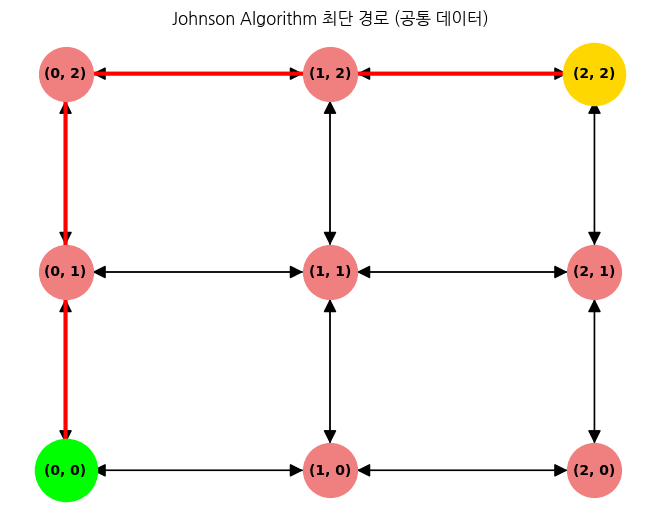

In [17]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def bellman_ford(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessors = {node: None for node in graph}

    for _ in range(len(graph) - 1):
        for u, neighbors in graph.items():
            for v, weight in neighbors.items():
                if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    predecessors[v] = u

    for u, neighbors in graph.items():
        for v, weight in neighbors.items():
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                return None, None

    return distances, predecessors

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]
    predecessors = {node: None for node in graph}

    while priority_queue:
        dist, current = heapq.heappop(priority_queue)

        if dist > distances[current]:
            continue

        for neighbor, weight in graph.get(current, {}).items():
            distance = dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current
                heapq.heappush(priority_queue, (distance, neighbor))
            elif distance == distances[neighbor] and neighbor not in predecessors: # 동등한 거리의 다른 경로 고려 (선택 사항)
                pass # 필요에 따라 처리

    return distances, predecessors

def johnson(graph):
    augmented_graph = {node: dict(neighbors) for node, neighbors in graph.items()}
    augmented_graph['s'] = {node: 0 for node in graph}

    h, _ = bellman_ford(augmented_graph, 's')
    if h is None:
        return None

    modified_graph = {}
    for u, neighbors in graph.items():
        modified_graph[u] = {}
        for v, weight in neighbors.items():
            modified_graph[u][v] = weight + h[u] - h[v]

    all_pairs_shortest_paths = {}
    all_pairs_predecessors = {}
    for start_node in graph:
        distances, predecessors = dijkstra(modified_graph, start_node)
        original_distances = {node: distances[node] - h[start_node] + h[node] for node in graph}
        all_pairs_shortest_paths[start_node] = original_distances
        all_pairs_predecessors[start_node] = predecessors

    return all_pairs_shortest_paths, all_pairs_predecessors

def reconstruct_path(predecessors, start, end):
    path = [end]
    current = end
    while current != start:
        if current not in predecessors:
            return None # 경로가 끊어진 경우
        current = predecessors[current]
        path.append(current)
    return path[::-1]

# 테스트 데이터 (방향 그래프)
graph_directed = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(2, 0): 1, (1, 1): 1, (0, 0): 1},
    (0, 1): {(1, 1): 1, (0, 2): 1, (0, 0): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (1, 1): {(1, 0): 1, (2, 1): 1, (0, 1): 1, (1, 2): 1},
    (0, 2): {(0, 1): 1, (1, 2): 1},
    (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1},
    (1, 2): {(0, 2): 1, (1, 1): 1, (2, 2): 1},
    (2, 2): {(2, 1): 1, (1, 2): 1}
}

start_node_common = (0, 0)
goal_node_common = (2, 2)

# Johnson 알고리즘 실행
shortest_paths_johnson_common, predecessors_johnson_common = johnson(graph_directed)

if shortest_paths_johnson_common:
    # 최단 거리 확인
    distance = shortest_paths_johnson_common.get(start_node_common, {}).get(goal_node_common)
    print(f"Johnson 알고리즘 (공통 데이터) {start_node_common} 에서 {goal_node_common} 까지의 최단 거리: {distance}")

    # 최단 경로 확인 및 출력
    path_johnson = reconstruct_path(predecessors_johnson_common.get(start_node_common, {}), start_node_common, goal_node_common)
    print(f"Johnson 알고리즘 (공통 데이터) {start_node_common} 에서 {goal_node_common} 까지의 최단 경로: {path_johnson}")

    # 그래프 시각화 (최단 경로 강조)
    if path_johnson:
        G_johnson_common = nx.DiGraph(graph_directed)
        pos = {node: node for node in G_johnson_common.nodes()}
        edge_labels = nx.get_edge_attributes(G_johnson_common, 'weight')

        nx.draw(G_johnson_common, pos, with_labels=True, node_size=1500, node_color='lightcoral', font_size=10, font_weight='bold', arrowstyle='-|>', arrowsize=20)
        nx.draw_networkx_edge_labels(G_johnson_common, pos, edge_labels=edge_labels)

        path_edges_johnson = [(path_johnson[i], path_johnson[i+1]) for i in range(len(path_johnson) - 1)]
        nx.draw_networkx_edges(G_johnson_common, pos, edgelist=path_edges_johnson, edge_color='red', width=3)
        nx.draw_networkx_nodes(G_johnson_common, pos, nodelist=[start_node_common], node_color='lime', node_size=2000)
        nx.draw_networkx_nodes(G_johnson_common, pos, nodelist=[goal_node_common], node_color='gold', node_size=2000)

        plt.title("Johnson Algorithm 최단 경로 (공통 데이터)")
        plt.show()
    else:
        print(f"{start_node_common} 에서 {goal_node_common} 까지의 경로가 없습니다.")

else:
    print("그래프에 음수 사이클이 존재합니다.")

---
#동일한 테스트 데이터 사용 및 시각화

In [18]:
# 테스트 데이터
graph_common = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(2, 0): 1, (1, 1): 1, (0, 0): 1},
    (0, 1): {(1, 1): 1, (0, 2): 1, (0, 0): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (1, 1): {(1, 0): 1, (2, 1): 1, (0, 1): 1, (1, 2): 1},
    (0, 2): {(0, 1): 1, (1, 2): 1},
    (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1},
    (1, 2): {(0, 2): 1, (1, 1): 1, (2, 2): 1},
    (2, 2): {(2, 1): 1, (1, 2): 1}
}

# 방향 그래프로 변환 (각 간선에 대해 역방향 간선도 추가, 필요에 따라 가중치 조정 가능)
graph_directed = {}
for u, neighbors in graph_common.items():
    graph_directed[u] = {}
    for v, weight in neighbors.items():
        graph_directed[u][v] = weight
        if v not in graph_directed:
            graph_directed[v] = {}
        graph_directed[v][u] = weight # 역방향 간선 추가 (가중치는 동일하게 설정)

start_node_common = (0, 0)
goal_node_common = (2, 2)

A* 알고리즘 (공통 데이터) 최단 경로: [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)]


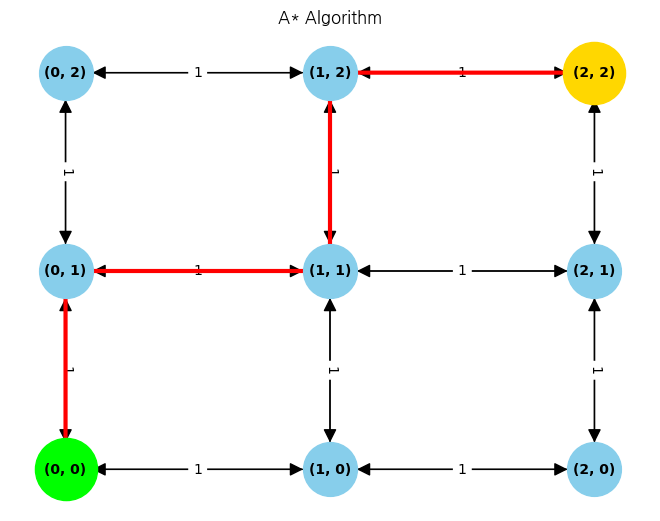

In [19]:
# (이전 A* 코드와 동일, graph_a_star 대신 graph_directed 사용)
path_a_star_common = a_star(graph_directed, start_node_common, goal_node_common, euclidean_distance)
print(f"A* 알고리즘 (공통 데이터) 최단 경로: {path_a_star_common}")

if path_a_star_common:
    G_a_star_common = nx.DiGraph() # 방향 그래프로 시각화
    for node, neighbors in graph_directed.items():
        G_a_star_common.add_node(node)
        for neighbor, weight in neighbors.items():
            G_a_star_common.add_edge(node, neighbor, weight=weight)

    pos = {node: node for node in G_a_star_common.nodes()}
    edge_labels = nx.get_edge_attributes(G_a_star_common, 'weight')

    nx.draw(G_a_star_common, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold', arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_edge_labels(G_a_star_common, pos, edge_labels=edge_labels)

    path_edges_common = [(path_a_star_common[i], path_a_star_common[i+1]) for i in range(len(path_a_star_common) - 1)]
    nx.draw_networkx_edges(G_a_star_common, pos, edgelist=path_edges_common, edge_color='red', width=3)
    nx.draw_networkx_nodes(G_a_star_common, pos, nodelist=[start_node_common], node_color='lime', node_size=2000)
    nx.draw_networkx_nodes(G_a_star_common, pos, nodelist=[goal_node_common], node_color='gold', node_size=2000)

    plt.title("A* Algorithm")
    plt.show()
else:
    print("목표 노드까지의 경로가 없습니다.")

Johnson 알고리즘 (공통 데이터) (0, 0) 에서 (2, 2) 까지의 최단 거리: 4
Johnson 알고리즘 (공통 데이터) (0, 0) 에서 (2, 2) 까지의 최단 경로: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]


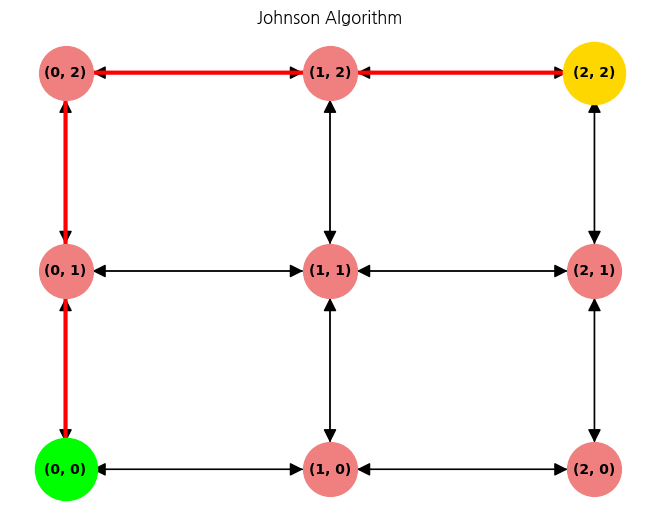

In [20]:
start_node_common = (0, 0)
goal_node_common = (2, 2)

def showJohnson(data) :
  # Johnson 알고리즘 실행
  shortest_paths_johnson_common, predecessors_johnson_common = johnson(data)

  if shortest_paths_johnson_common:
      # 최단 거리 확인
      distance = shortest_paths_johnson_common.get(start_node_common, {}).get(goal_node_common)
      print(f"Johnson 알고리즘 (공통 데이터) {start_node_common} 에서 {goal_node_common} 까지의 최단 거리: {distance}")

      # 최단 경로 확인 및 출력
      path_johnson = reconstruct_path(predecessors_johnson_common.get(start_node_common, {}), start_node_common, goal_node_common)
      print(f"Johnson 알고리즘 (공통 데이터) {start_node_common} 에서 {goal_node_common} 까지의 최단 경로: {path_johnson}")

      # 그래프 시각화 (최단 경로 강조)
      if path_johnson:
          G_johnson_common = nx.DiGraph(data)
          pos = {node: node for node in G_johnson_common.nodes()}
          edge_labels = nx.get_edge_attributes(G_johnson_common, 'weight')

          nx.draw(G_johnson_common, pos, with_labels=True, node_size=1500, node_color='lightcoral', font_size=10, font_weight='bold', arrowstyle='-|>', arrowsize=20)
          nx.draw_networkx_edge_labels(G_johnson_common, pos, edge_labels=edge_labels)

          path_edges_johnson = [(path_johnson[i], path_johnson[i+1]) for i in range(len(path_johnson) - 1)]
          nx.draw_networkx_edges(G_johnson_common, pos, edgelist=path_edges_johnson, edge_color='red', width=3)
          nx.draw_networkx_nodes(G_johnson_common, pos, nodelist=[start_node_common], node_color='lime', node_size=2000)
          nx.draw_networkx_nodes(G_johnson_common, pos, nodelist=[goal_node_common], node_color='gold', node_size=2000)

          plt.title("Johnson Algorithm")
          plt.show()
      else:
          print(f"{start_node_common} 에서 {goal_node_common} 까지의 경로가 없습니다.")

  else:
      print("그래프에 음수 사이클이 존재합니다.")

showJohnson(graph_directed)


---
# Dijkstra, A*, Johnson 알고리즘 성능 비교 정리

###**Dijkstra와 A***

두 알고리즘 모두 실행 시간이 매우 짧고, 그래프 크기가 커져도 실행 시간에 거의 변화가 없음

실행 시간 축에서 두 알고리즘의 그래프가 거의 0에 가까운 수평선으로 나타나며, Johnson 알고리즘에 비해 빠름

###**Johnson 알고리즘**

그래프 크기가 커질수록 실행 시간이 빠르게 증가

특히 15×15, 25×25와 같이 그래프가 커질수록 실행 시간이 급격히 늘어남

작은 그래프에서는 Dijkstra, A*와 큰 차이가 없지만, 그래프가 커질수록 성능 차이가 뚜렷

<br><br>
그래프 크기가 커질수록 Johnson 알고리즘의 실행 시간이 급격히 증가하며, Dijkstra와 A는 매우 빠른 성능을 꾸준히 유지 대규모 그래프에서는 Dijkstra와 A*가 효율적


--- 그래프 크기: 5x5 ---
Dijkstra 실행 시간: 0.000047 초
A* 실행 시간: 0.000072 초
Johnson 실행 시간: 0.001003 초

--- 그래프 크기: 10x10 ---
Dijkstra 실행 시간: 0.000110 초
A* 실행 시간: 0.000207 초
Johnson 실행 시간: 0.016796 초

--- 그래프 크기: 15x15 ---
Dijkstra 실행 시간: 0.000255 초
A* 실행 시간: 0.000502 초
Johnson 실행 시간: 0.072626 초

--- 그래프 크기: 25x25 ---
Dijkstra 실행 시간: 0.000812 초
A* 실행 시간: 0.001704 초
Johnson 실행 시간: 0.609389 초


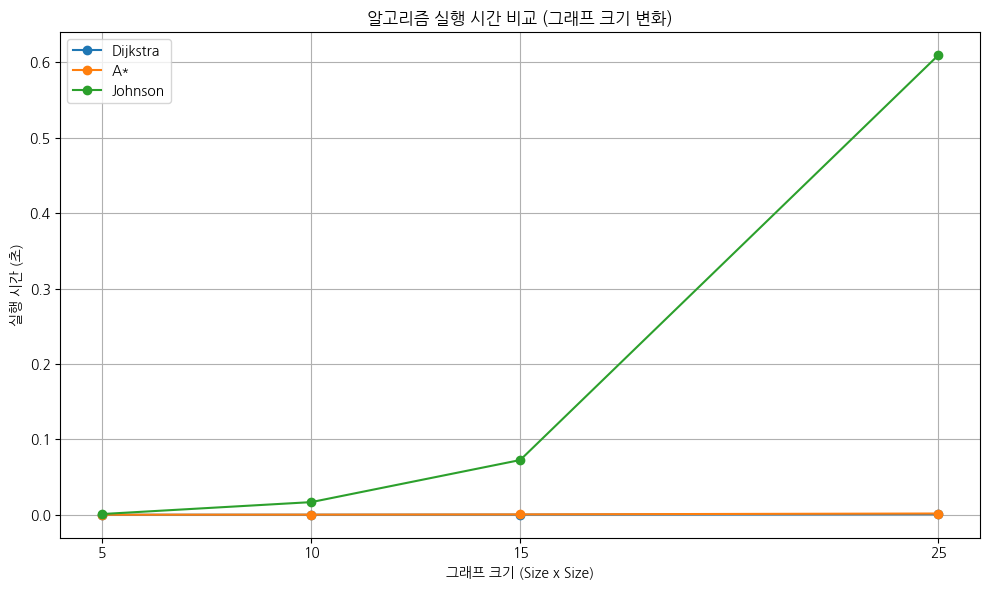

In [21]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import time
import random

def generate_grid_graph(size):
    graph = {}
    for i in range(size):
        for j in range(size):
            node = (i, j)
            graph[node] = {}
            # 오른쪽 이웃
            if j + 1 < size:
                neighbor = (i, j + 1)
                weight = random.randint(1, 5)
                graph[node][neighbor] = weight
                if neighbor not in graph:
                    graph[neighbor] = {}
                graph[neighbor][node] = weight # 무방향 그래프로 일단 생성

            # 아래쪽 이웃
            if i + 1 < size:
                neighbor = (i + 1, j)
                weight = random.randint(1, 5)
                graph[node][neighbor] = weight
                if neighbor not in graph:
                    graph[neighbor] = {}
                graph[neighbor][node] = weight # 무방향 그래프로 일단 생성
    return graph

def to_directed_graph(undirected_graph):
    directed_graph = {node: {} for node in undirected_graph}
    for u, neighbors in undirected_graph.items():
        for v, weight in neighbors.items():
            directed_graph[u][v] = weight
    return directed_graph

def euclidean_distance(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]
    predecessors = {node: None for node in graph}
    while priority_queue:
        dist, current = heapq.heappop(priority_queue)
        if dist > distances[current]:
            continue
        for neighbor, weight in graph.get(current, {}).items():
            distance = dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current
                heapq.heappush(priority_queue, (distance, neighbor))
    return distances, predecessors

def a_star(graph, start, goal, heuristic):
    open_set = [(0, start)]
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)
    while open_set:
        current_f, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        for neighbor, weight in graph.get(current, {}).items():
            tentative_g_score = g_score[current] + weight
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                if (f_score[neighbor], neighbor) not in open_set:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None

def bellman_ford(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessors = {node: None for node in graph}
    for _ in range(len(graph) - 1):
        for u, neighbors in graph.items():
            for v, weight in neighbors.items():
                if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    predecessors[v] = u
    for u, neighbors in graph.items():
        for v, weight in neighbors.items():
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                return None, None
    return distances, predecessors

def johnson(graph):
    augmented_graph = {node: dict(neighbors) for node, neighbors in graph.items()}
    augmented_graph['s'] = {node: 0 for node in graph}
    h, _ = bellman_ford(augmented_graph, 's')
    if h is None:
        return None, None
    modified_graph = {}
    all_pairs_predecessors = {}
    for u, neighbors in graph.items():
        modified_graph[u] = {}
        for v, weight in neighbors.items():
            modified_graph[u][v] = weight + h[u] - h[v]
    all_pairs_shortest_paths = {}
    for start_node_johnson in graph:
        distances, predecessors = dijkstra(modified_graph, start_node_johnson)
        original_distances = {node: distances[node] - h[start_node_johnson] + h[node] for node in graph}
        all_pairs_shortest_paths[start_node_johnson] = original_distances
        all_pairs_predecessors[start_node_johnson] = predecessors
    return all_pairs_shortest_paths, all_pairs_predecessors

# 테스트 데이터 사이즈
sizes = [5, 10, 15, 25]
execution_times_comparison = {'Dijkstra': [], 'A*': [], 'Johnson': []}

for size in sizes:
    print(f"\n--- 그래프 크기: {size}x{size} ---")
    undirected_graph = generate_grid_graph(size)
    directed_graph = to_directed_graph(undirected_graph)
    start_node_current = (0, 0)
    goal_node_current = (size - 1, size - 1)

    # Dijkstra 실행 시간 측정
    start_time = time.time()
    dijkstra(directed_graph, start_node_current)
    end_time = time.time()
    execution_times_comparison['Dijkstra'].append(end_time - start_time)
    print(f"Dijkstra 실행 시간: {end_time - start_time:.6f} 초")

    # A* 실행 시간 측정
    start_time = time.time()
    a_star(directed_graph, start_node_current, goal_node_current, euclidean_distance)
    end_time = time.time()
    execution_times_comparison['A*'].append(end_time - start_time)
    print(f"A* 실행 시간: {end_time - start_time:.6f} 초")

    # Johnson 실행 시간 측정
    start_time = time.time()
    johnson(directed_graph)
    end_time = time.time()
    execution_times_comparison['Johnson'].append(end_time - start_time)
    print(f"Johnson 실행 시간: {end_time - start_time:.6f} 초")

# 실행 시간 시각화 (사이즈에 따른 변화)
plt.figure(figsize=(10, 6))
for algorithm, times in execution_times_comparison.items():
    plt.plot(sizes, times, marker='o', label=algorithm)

plt.xlabel("그래프 크기 (Size x Size)")
plt.ylabel("실행 시간 (초)")
plt.title("알고리즘 실행 시간 비교 (그래프 크기 변화)")
plt.xticks(sizes)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()